In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import json
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [29]:
all_movie_data = pd.read_excel("MOVIE.xlsx")
movie_data = pd.DataFrame(all_movie_data, columns= ['ID', 'FILMID','TITLE','BUDGET','REVENUE','RUNTIME','VOTE_AVERAGE'])

In [30]:
movie_data = movie_data[movie_data.BUDGET != 0]

In [31]:
movie_data = movie_data[movie_data.REVENUE != 0]

In [32]:
movie_data = movie_data[movie_data.RUNTIME != 0]

In [33]:
display(movie_data)

,ID,FILMID,TITLE,BUDGET,REVENUE,RUNTIME,VOTE_AVERAGE
7,8,337401,Mulan,200000000,57000000,115.0,7.3
15,16,581392,Peninsula,17000000,35878266,114.0,7.1
32,33,495764,Birds of Prey (and the Fantabulous Emancipatio...,75000000,201858461,109.0,7.2
34,35,38700,Bad Boys for Life,90000000,419074646,124.0,7.2
42,44,338762,Bloodshot,42000000,30234182,110.0,7.0
...,...,...,...,...,...,...,...
159370,167236,84200,"For a Good Time, Call...",850000,1243961,85.0,5.9
159513,167381,84305,Lay the Favorite,26350000,1576687,94.0,5.3
159540,167408,84336,Shadow Dancer,6300000,1777709,101.0,6.0
159577,167445,84355,Your Sister's Sister,125000,3200000,90.0,6.6


In [8]:
movie_budget = movie_data.sort_values(by = 'BUDGET', ascending = False)
movie_budget.head()

,ID,FILMID,TITLE,BUDGET,REVENUE,VOTE_AVERAGE
3271,3281,1865,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,6.5
88,90,299534,Avengers: Endgame,356000000,2797800564,8.3
216,218,141052,Justice League,300000000,657924295,6.2
641,644,285,Pirates of the Caribbean: At World's End,300000000,961000000,7.2
77,79,299536,Avengers: Infinity War,300000000,2046239637,8.3


In [9]:
movie_revenue = movie_data.sort_values(by = 'REVENUE', ascending = False)
movie_revenue.head()

,ID,FILMID,TITLE,BUDGET,REVENUE,VOTE_AVERAGE
88,90,299534,Avengers: Endgame,356000000,2797800564,8.3
329,331,19995,Avatar,237000000,2787965087,7.5
526,528,597,Titanic,200000000,2187463944,7.9
686,689,140607,Star Wars: The Force Awakens,245000000,2068223624,7.4
77,79,299536,Avengers: Infinity War,300000000,2046239637,8.3


In [10]:
movie_vote = movie_data.sort_values(by = 'VOTE_AVERAGE', ascending = False)
movie_vote.head()

,ID,FILMID,TITLE,BUDGET,REVENUE,VOTE_AVERAGE
153341,161065,724295,Tanhaji : The Unsung Warrior,19908420,52,10.0
58035,58654,187527,Tell 'em Steve-Dave: Puppet Theater,46,46,10.0
93926,95493,309174,Mayday! Überfall auf hoher See,200000,500000,10.0
97926,99590,386089,Scandalize My Name: Stories from the Blacklist,1000000,100000,10.0
50611,51104,256758,Flame and the Flesh,1275000,2294000,10.0


In [35]:
rate_1 = movie_data[movie_data['VOTE_AVERAGE'] <= 1] #54
rate_2 = movie_data[(movie_data['VOTE_AVERAGE'] > 1) & (movie_data['VOTE_AVERAGE'] <= 2)] #6
rate_3 = movie_data[(movie_data['VOTE_AVERAGE'] > 2) & (movie_data['VOTE_AVERAGE'] <= 3)] #21
rate_4 = movie_data[(movie_data['VOTE_AVERAGE'] > 3) & (movie_data['VOTE_AVERAGE'] <= 4)] #69
rate_5 = movie_data[(movie_data['VOTE_AVERAGE'] > 4) & (movie_data['VOTE_AVERAGE'] <= 5)] #378
rate_6 = movie_data[(movie_data['VOTE_AVERAGE'] > 5) & (movie_data['VOTE_AVERAGE'] <= 6)] #1697
rate_7 = movie_data[(movie_data['VOTE_AVERAGE'] > 6) & (movie_data['VOTE_AVERAGE'] <= 7)] #2888
rate_8 = movie_data[(movie_data['VOTE_AVERAGE'] > 7) & (movie_data['VOTE_AVERAGE'] <= 8)] #1457
rate_9 = movie_data[(movie_data['VOTE_AVERAGE'] > 8) & (movie_data['VOTE_AVERAGE'] <= 9)] #140
rate_10 = movie_data[movie_data['VOTE_AVERAGE'] >= 9] #11  #Total = 6721

In [34]:
rate_1.head()

,ID,FILMID,TITLE,BUDGET,REVENUE,VOTE_AVERAGE
4092,4102,688303,Batman: Most Wanted,300,300,0.0
10023,10048,96504,Blowin' In The Wind,12000,167000,0.0
12494,12579,659905,Leslie Nielsen's Bad Golf My Way,7,14,0.0
15202,15355,430759,Finn & the Sea of Noise,8,6,0.0
28671,28967,243754,After Life,2000000,249104,0.0


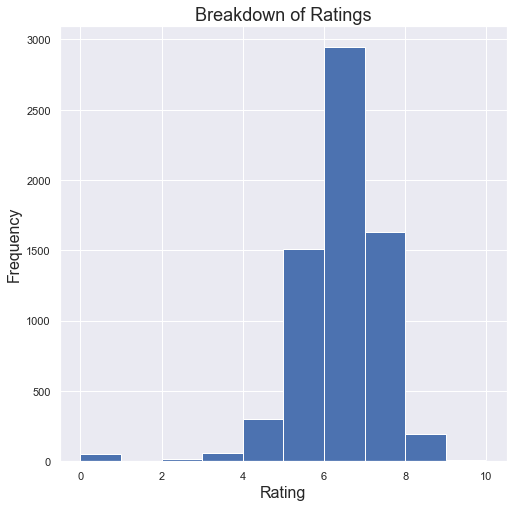

In [13]:
movie_vote['VOTE_AVERAGE'].plot(kind='hist', figsize = (8,8));
plt.title('Breakdown of Ratings', fontsize = 18)
plt.xlabel('Rating', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16);

In [14]:
revenue_vote= pd.DataFrame(movie_data, columns= ['REVENUE','VOTE_AVERAGE'])

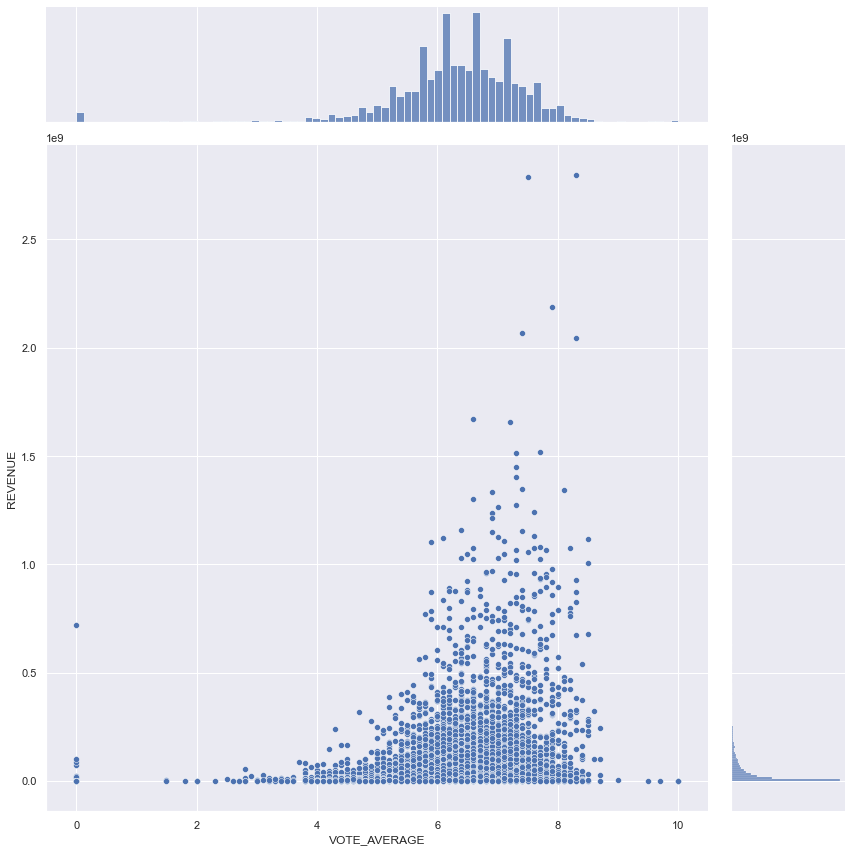

In [15]:
sb.jointplot(data = revenue_vote, x = "VOTE_AVERAGE", y = "REVENUE", height = 12)

In [16]:
revenue_vote.describe()

,REVENUE,VOTE_AVERAGE
count,6.720000e+03,6720.000000
mean,8.653333e+07,6.342738
std,1.723084e+08,1.077094
min,1.000000e+00,0.000000
25%,5.213124e+06,5.800000
50%,2.534557e+07,6.400000
75%,9.043229e+07,7.000000
max,2.797801e+09,10.000000


<AxesSubplot:xlabel='VOTE_AVERAGE', ylabel='REVENUE'>

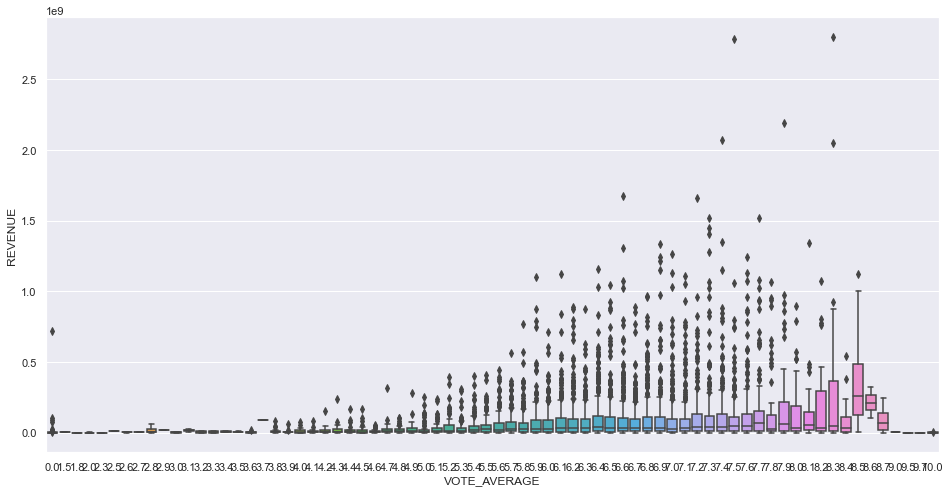

In [22]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'VOTE_AVERAGE', y = 'REVENUE', data = revenue_vote)